# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
## train 경로 : ./archive/train.csv
## 데이터 불러오기

titanic_df = pd.read_csv("./archive/train.csv")

## 1. 분석의 목적과 변수 확인

In [6]:
##  상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [8]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
## 상관계수 확인!

titanic_df.corr()

# Correlation is Not Causation

# 상관성 : A up, B up, ...
# 인과성 : A -> B ...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

 ### I. Survived Column

In [13]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].sum()

342

In [14]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

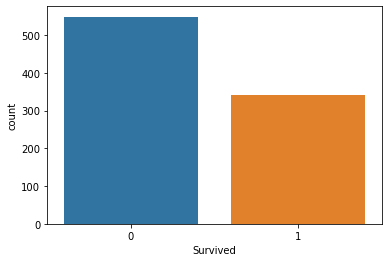

In [15]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [17]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
# Pclass에 따른 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
# Pclass에 따른 생존자 비율

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

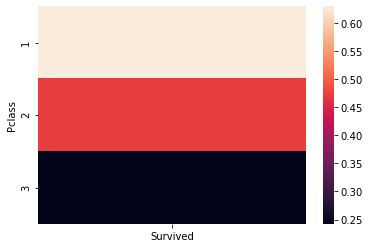

In [25]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### III.Sex

In [30]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

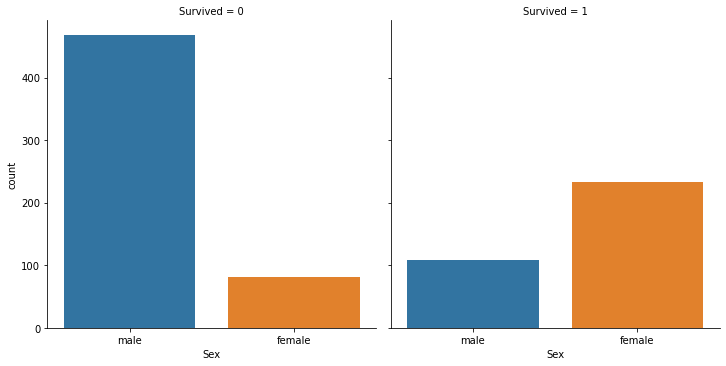

In [31]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### IV. Age
#### Remind : 결축치 존재!

In [33]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

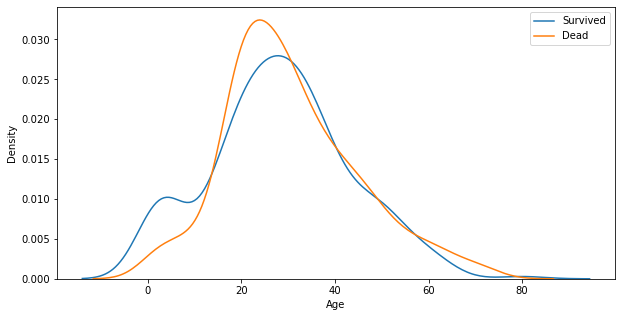

In [40]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

### Appendix I. Sex + Pclass vs Survived

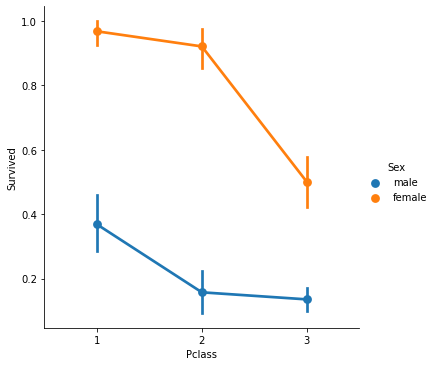

In [44]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)

plt.show()

### Appendix II. Age + Pclass

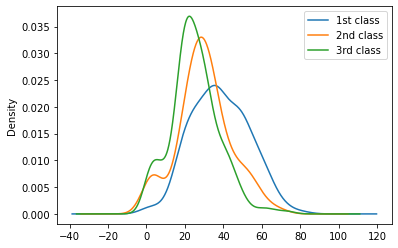

In [48]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend(['1st class','2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### Mission 1 Parch vs Survive

### Parch
* 함께 탑승한 부모 / 자녀의 수를 나타냄.
* 3명 이상부터는 데이터의 크기가 작다고 판단함.
* 0: 배에 자식이 없음. 1: 배에 자식이 있음. 으로 구분할 것.
* 자식이 있다면 자식을 우선적으로 하기 위해 생존률이 낮을 것으로 예상

In [12]:
# Parch
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# 자식 有 : 213  자식 無 : 678 -> 이 이하로는 편하게 hc(have child), nc(no child)로 명함.
titanic_df['Parch'] = titanic_df['Parch'].apply(lambda x:'hc' if x > 0 else 'nc')
titanic_df['Parch'].value_counts()

nc    678
hc    213
Name: Parch, dtype: int64

In [14]:
# hc,nc의 생존자 수
titanic_df.groupby(['Survived','Parch'])['Survived'].count()

Survived  Parch
0         hc       104
          nc       445
1         hc       109
          nc       233
Name: Survived, dtype: int64

In [15]:
# hc와 nc의 생존율 비교
titanic_df[['Survived','Parch']].groupby(['Parch'])['Survived'].mean()

# hc의 생존율이 더 높음. 하지만 이는 hc의 값이 모두 부모인 경우가 아니라 자식인 경우가 포함되어 있는 것으로 추측됨.
# 이를 알기 위해 hc의 데이터를 'Age'에 따라 분류해 생존율을 비교해볼 필요가 있음.

Parch
hc    0.511737
nc    0.343658
Name: Survived, dtype: float64

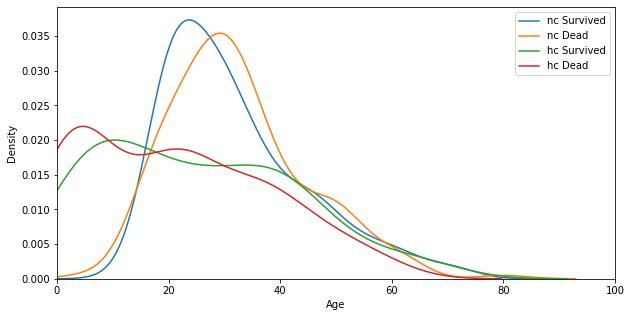

In [17]:
## Age에 따른 nc와 hc

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[(titanic_df.Survived == 0) & (titanic_df.Parch == 'nc')]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[(titanic_df.Survived == 1) & (titanic_df.Parch == 'nc')]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[(titanic_df.Survived == 0) & (titanic_df.Parch == 'hc')]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[(titanic_df.Survived == 1) & (titanic_df.Parch == 'hc')]['Age'], ax=ax)

plt.xlim(0,100)
plt.legend(['nc Survived', 'nc Dead', 'hc Survived', 'hc Dead'])
plt.show()

In [42]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

* hc 20,30대의 생존율은 50%으로 보이고, hc 10대의 생존율과 30대후반 이상의 생존율은 50%이상으로 보인다.
* nc와 다르게 hc 고령일수록 생존율이 더 높은 것을 알 수 있다.
* 0~10대 초반은 생존율이 낮다.

### 결론
* 자식이 있는 20~30대 부모나 고령의 부모가 있는 20~30대 자식들은 자신들의 자식 혹은 부모에게 우선적으로 양보한 것으로 보인다.
* 하지만 0~10대 초반은 (특히 영유아) 부모와 함께 행동했을 가능성이 크므로 생존율이 낮은 것으로 추측된다. 

### Misson2 (해당 코드는 Day4 mission과 동일하여 (week4/day4) 경로에도 첨부했습니다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Stroke Prediction Dataset
stroke_df = pd.read_csv('./archive/healthcare-dataset-stroke-data.csv')

In [48]:
# 1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 6) ever_married: "No" or "Yes"
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 8) Residence_type: "Rural" or "Urban"
# 9) avg_glucose_level: average glucose level in blood
# 10) bmi: body mass index
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# 12) stroke: 1 if the patient had a stroke or 0 if not
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# gender 수치화 , Male : 0, Female : 1
stroke_df['gender'] = stroke_df['gender'].apply(lambda x: 0 if x == 'Male' else 1)
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [58]:
stroke_df.corr()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.001776,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
gender,-0.001776,1.000000,0.027623,-0.021275,-0.085717,-0.054580,0.026020,-0.009117
age,0.003538,0.027623,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,-0.021275,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,-0.085717,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,-0.054580,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.026020,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,-0.009117,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


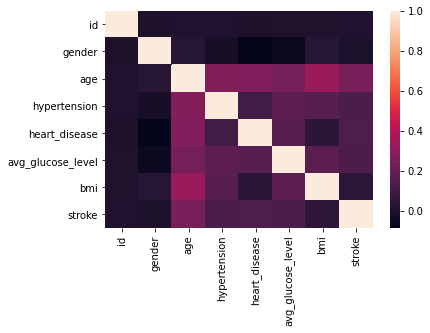

In [57]:
sns.heatmap(stroke_df.corr())
plt.show()

* heatmap을 봤을 때 'age', 'hypertension', 'heart_disease'에서 연관성이 보임.

### 추측
* 'age'와 연관성
* 'hypertension'과 연관성
* 'heart_disease'와 연관성
* 'gender'와 연관성

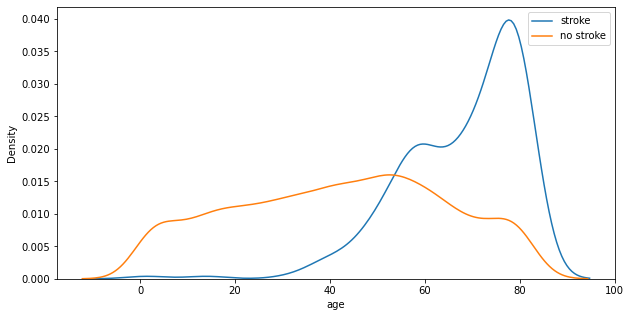

In [6]:
## 'age'와 'storke'의 연관성 시각화
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=stroke_df[stroke_df.stroke == 1]['age'], ax=ax)
sns.kdeplot(x=stroke_df[stroke_df.stroke == 0]['age'], ax=ax)

plt.legend(['stroke', 'no stroke'])
plt.show()

위의 plot을 봤을 때, 나이가 많을수록 stroke 환자가 많은 것을 알 수 있다.

In [32]:
## 'age'와 'hypertension'의 연관성
stroke_df[['hypertension','stroke']].groupby('stroke').sum()

,hypertension
stroke,
0,432
1,66


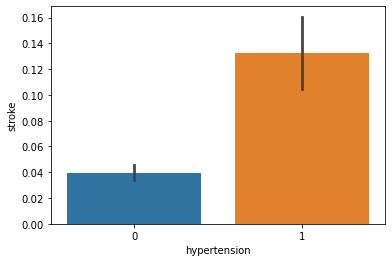

In [28]:
## 'age'와 'hypertension'의 연관성 시각화

sns.barplot(x='hypertension',y = 'stroke',data= (stroke_df))
plt.show()

stroke(뇌졸중) 환자 중, hypertesion을 앓는 환자의 비율이 그렇지 않은 환자들보다 높은 것으로 나타났다.

In [36]:
## 'age'와 'heart_disease'의 연관성
stroke_df[['heart_disease','stroke']].groupby('heart_disease').sum()

,stroke
heart_disease,
0,202
1,47


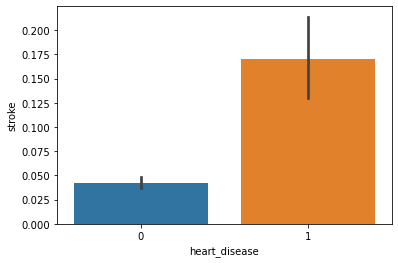

In [37]:
## 'age'와 'heart_disease'의 연관성 시각화

sns.barplot(x='heart_disease',y = 'stroke',data= (stroke_df))
plt.show()

### Hint
1. 데이터를 돌아봅시다.
* 각 데이터는 어떤 자료형을 가지고 있나요?
* 데이터에 결측치는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
* 데이터의 자료형을 바꿔줄 필요가 있나요? -? 범주형의 One-hot encoding

2. 데이터에 대한 가설을 세워봅시다.
* 가설은 개인의 경험에 의해서 도출되어도 상관없습니다.
* 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다.

3. 가설을 검증하기 위한 증거를 찾아봅시다.
* 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다른 여러 Technique를 써줘야 합니다.
* `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
* `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
* 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?